In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset

customer_data = pd.read_csv('D:\kim\Data Visualization with Python\Datasets\Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

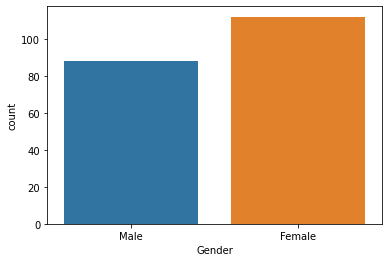

In [6]:
sns.countplot(customer_data['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

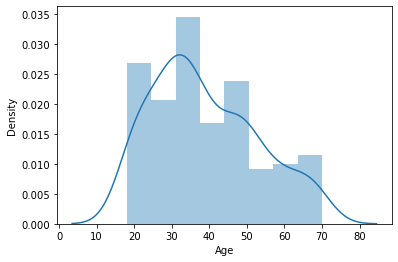

In [7]:
sns.distplot(customer_data['Age'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

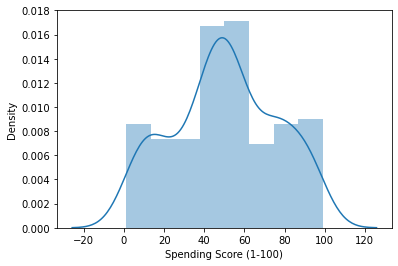

In [8]:
sns.distplot(customer_data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

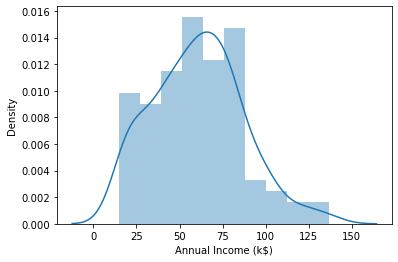

In [9]:
sns.distplot(customer_data['Annual Income (k$)'])

<AxesSubplot:>

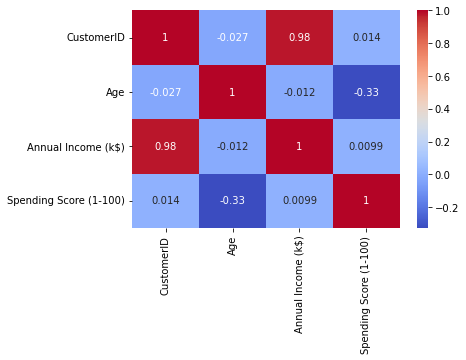

In [10]:
sns.heatmap(customer_data.corr(),annot = True, cmap="coolwarm")

In [11]:
customer_data1 = customer_data[['Annual Income (k$)','Spending Score (1-100)']]
customer_data1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

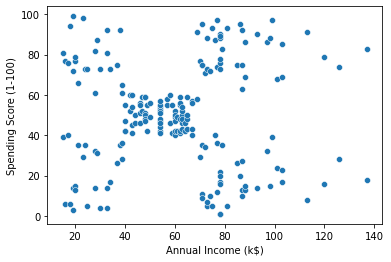

In [12]:
sns.scatterplot(customer_data1['Annual Income (k$)'], customer_data1['Spending Score (1-100)'])

In [13]:
from sklearn.cluster import KMeans
errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customer_data1)
    errors.append(kmeans.inertia_)

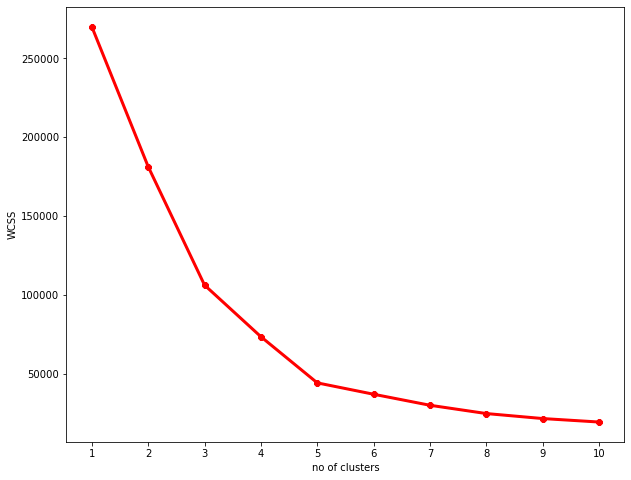

In [14]:
# elbow method

plt.figure(figsize= (10,8))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

In [15]:
# use 5 clusters

km = KMeans(n_clusters = 5)
km.fit(customer_data1)
y = km.predict(customer_data1)
customer_data1['label'] = y
customer_data1.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


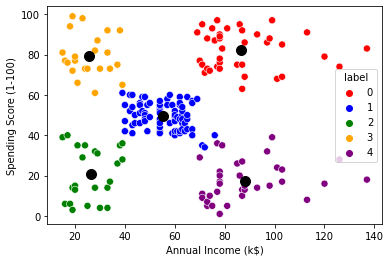

In [16]:
sns.scatterplot(x= 'Annual Income (k$)', y = 'Spending Score (1-100)', data = customer_data1, s = 50,
                hue = 'label', palette = ['red','blue','green','orange','purple'])
#plotting the centroids

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=100, c="black", label="centroids")

In [17]:
#3d

customer_data2 = customer_data[['Annual Income (k$)','Spending Score (1-100)','Age']]
customer_data2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [18]:

errors = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customer_data2)
    errors.append(kmeans.inertia_)

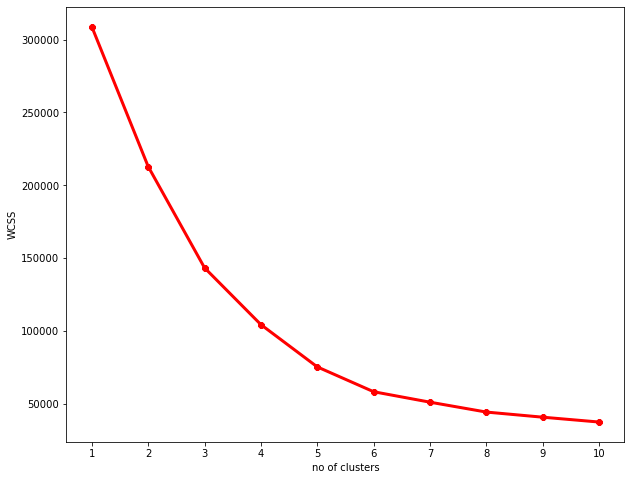

In [19]:
# elbow method for data2

plt.figure(figsize= (10,8))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

In [20]:
# use 5 clusters for data2

km = KMeans(n_clusters = 5)
km.fit(customer_data2)
y = km.predict(customer_data2)
customer_data2['label'] = y
customer_data2.head()

,Annual Income (k$),Spending Score (1-100),Age,label
0,15,39,19,1
1,15,81,21,2
2,16,6,20,1
3,16,77,23,2
4,17,40,31,1


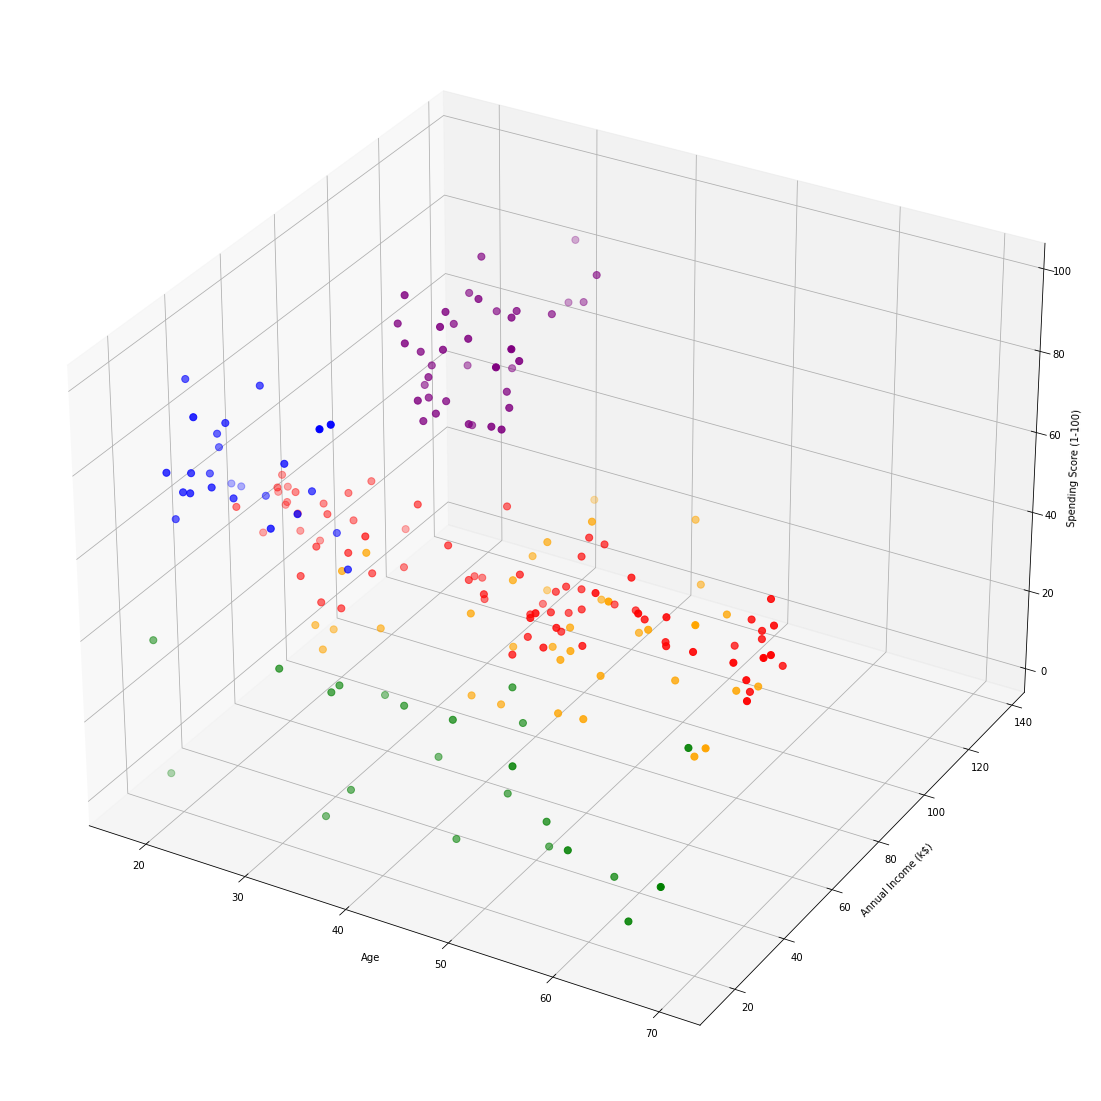

In [25]:
# 3d scatter plot

fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111 , projection = '3d')

ax.scatter(customer_data2['Age'][customer_data2['label']==0],customer_data2['Annual Income (k$)'][customer_data2['label']==0],customer_data2['Spending Score (1-100)'][customer_data2['label']==0], c="red", s=50)

ax.scatter(customer_data2['Age'][customer_data2['label']==1],customer_data2['Annual Income (k$)'][customer_data2['label']==1],customer_data2['Spending Score (1-100)'][customer_data2['label']==1], c="green", s=50)

ax.scatter(customer_data2['Age'][customer_data2['label']==2],customer_data2['Annual Income (k$)'][customer_data2['label']==2],customer_data2['Spending Score (1-100)'][customer_data2['label']==2], c="blue", s=50)

ax.scatter(customer_data2['Age'][customer_data2['label']==3],customer_data2['Annual Income (k$)'][customer_data2['label']==3],customer_data2['Spending Score (1-100)'][customer_data2['label']==3], c="orange", s=50)

ax.scatter(customer_data2['Age'][customer_data2['label']==4],customer_data2['Annual Income (k$)'][customer_data2['label']==4],
          customer_data2['Spending Score (1-100)'][customer_data2['label']==4], c="purple", s=50)


ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()